# Etivity 2
#### Student Name: Dáithí Horan

#### Student Number: 15162818

Open a new Jupyter notebook and name it etivity2.ipynb. In your notebook, 


1 Load bank.csv into a Pandas dataframe. 

Follow the examples and process in Lab 2 - Data Preparation.ipynb to prepare bank.csv for machine learning, ensure that you have:

2 encoded all categorical attributes as numerical,

3 filled in all missing values

4 applied a scaler to rescale features

5 treated outliers appropriately

6 created at least one new feature from the existing ones



7 Shortly describe and Justify the data preparation choices you have taken in markdown cells. Aim at not having markdown cells longer than 2-3 lines of text.


8 In the end, save the prepared dataset as a CSV file on your hard disk.

## Task 2.1

In [248]:
# Import Modules and Dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object


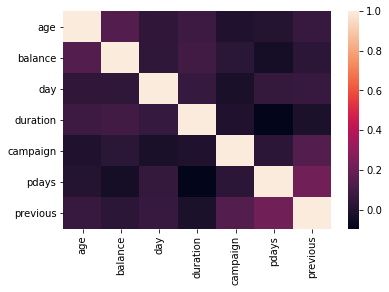

In [249]:
# Check column data type
print(df.dtypes)
#correlation matrix
sns.heatmap(df.corr());

In [250]:
# Copy Dataset
df_original = df

In [251]:
# Check for missing values.
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [252]:
# Remove useless information
# no ID lines to remove

In [253]:
# Encode Cat. data
# no ordinal categories

## Task 2.2

## Task 2.3: Fill in all missing values

In [254]:
# Check for missing values.
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

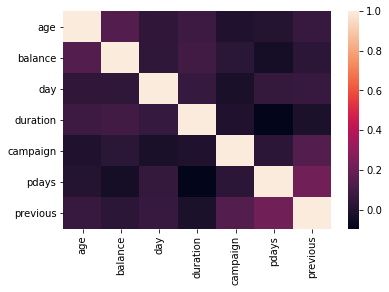

In [255]:
#correlation matrix
sns.heatmap(df.corr());

In [256]:
df_original['subscribed'].value_counts()

yes    1000
no     1000
Name: subscribed, dtype: int64

In [257]:
# Subscribed encoding 

# Map values
mapping = {'yes': 1, 'no': 0}

# apply mapping to the relevant column
df['subscribed'] = df['subscribed'].map(mapping)

In [258]:
# housing encoding 

# Map values
mapping = {'yes': 1, 'no': 0}

# apply mapping to the relevant column
df['housing'] = df['housing'].map(mapping)

In [259]:
# loan encoding 

# Map values
mapping = {'yes': 1, 'no': 0}

# apply mapping to the relevant column
df['loan'] = df['loan'].map(mapping)

In [260]:
# default encoding 

# Map values
mapping = {'yes': 1, 'no': 0}

# apply mapping to the relevant column
df['default'] = df['default'].map(mapping)

In [261]:
# One-Hot Encode All Other Categorical Attributes
df = pd.get_dummies(df, columns=[
    'job', 'marital',   'education'], # 'month', 'contact' , 'subscribed' , 'poutcome', 'default', 'housing', 'loan', 
                    dummy_na=True, 
                    drop_first=True)
df.tail()

age  default  balance  housing  loan    contact  day month  duration  \
1995  20.0        0     2785        0     0   cellular   16   sep       327   
1996  28.0        0      127        0     0   cellular   16   sep      1334   
1997  81.0        0     1154        0     0  telephone   17   sep       231   
1998  46.0        0     4343        1     0        NaN   20   sep       185   
1999  40.0        0     6403        0     0   cellular   22   sep       208   

      campaign  ...  job_student  job_technician job_unemployed  job_nan  \
1995         2  ...            1               0              0        0   
1996         2  ...            0               0              0        0   
1997         1  ...            0               0              0        0   
1998         1  ...            0               0              0        0   
1999         2  ...            0               0              0        0   

      marital_married  marital_single  marital_nan  education_secondary  \
1995                0               1            0                    0   
1996                0               1            0                    1   
1997                1               0            0                    0   
1998                1               0            0                    0   
1999                1               0            0                    1   

      education_tertiary  education_nan  
1995                   0              1  
1996                   0              0  
1997                   0              0  
1998                   0              0  
1999                   0              0  

[5 rows x 31 columns]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


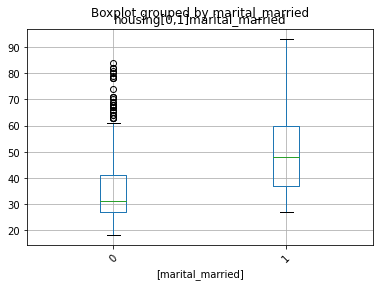

In [266]:
# I hypothesize that attributes Education and Self_Employed combined can give a good estimate of LoanAmount.
df.loc[df['housing']==0].boxplot(column='age', by=['marital_married'], rot=45)
plt.title("housing[0,1]marital_married")
plt.show()

In [267]:
# I hypothesise that attributes Education and Self_Employed combined can give a good estimate of LoanAmount.
#df.boxplot(column='age', by=['housing'==0,'marital_married'], rot=45)
# plt.title("")
# plt.show()

In [268]:
ptable = df.pivot_table(values='age', 
                        index='housing',
                        columns='marital_married',  
                        aggfunc=np.median)
ptable

marital_married     0     1
housing                    
0                31.0  48.0
1                35.0  41.0

In [270]:
def get_element(x):
    return ptable.loc[x['housing'], x['marital_married']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [271]:
# Encode contact
df['contact'].fillna('cellular', inplace=True) 

In [272]:

df_original['poutcome'].value_counts()

# Replace missing values
df['poutcome'].fillna('not_contacted', inplace=True)

df['poutcome'].value_counts()

failure          955
not_contacted    454
success          444
other            147
Name: poutcome, dtype: int64

In [273]:
#ptable = df.pivot_table(values='pdays', 
 #                       index='previous',
  #                      columns='poutcome',  
   #                     aggfunc=np.mean)
#ptable

df.tail()

age  default  balance  housing  loan    contact  day month  duration  \
1995  20.0        0     2785        0     0   cellular   16   sep       327   
1996  28.0        0      127        0     0   cellular   16   sep      1334   
1997  81.0        0     1154        0     0  telephone   17   sep       231   
1998  46.0        0     4343        1     0   cellular   20   sep       185   
1999  40.0        0     6403        0     0   cellular   22   sep       208   

      campaign  ...  job_student  job_technician job_unemployed  job_nan  \
1995         2  ...            1               0              0        0   
1996         2  ...            0               0              0        0   
1997         1  ...            0               0              0        0   
1998         1  ...            0               0              0        0   
1999         2  ...            0               0              0        0   

      marital_married  marital_single  marital_nan  education_secondary  \
1995                0               1            0                    0   
1996                0               1            0                    1   
1997                1               0            0                    0   
1998                1               0            0                    0   
1999                1               0            0                    1   

      education_tertiary  education_nan  
1995                   0              1  
1996                   0              0  
1997                   0              0  
1998                   0              0  
1999                   0              0  

[5 rows x 31 columns]

In [245]:
# Encode education 
# not requied as education_nan automaticallly made.

In [246]:
# Check for missing values.
df.isna().sum()

age                    0
balance                0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
default_yes            0
default_nan            0
housing_yes            0
housing_nan            0
loan_yes               0
loan_nan               0
education_secondary    0
education_tertiary     0
education_nan          0
dtype: int64

In [223]:
# One-Hot Encode All Other Categorical Attributes
df = pd.get_dummies(df, columns=[
    'job', 'marital',  'default', 'housing', 'loan','contact'], # 'month' ,   'subscribed' , 'poutcome', 'education', 
                    dummy_na=True, 
                    drop_first=True)
df.tail()

KeyError: "None of [Index(['job', 'marital', 'default', 'housing', 'loan', 'contact'], dtype='object')] are in the [columns]"

In [158]:
# Check for missing values.
df.isna().sum()

age                    0
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
education_secondary    0
education_tertiary     0
education_nan          0
default_yes            0
default_nan            0
housing_yes            0
housing_nan            0
loan_yes               0
loan_nan               0
contact_telephone      0
contact_nan            0
subscribed_yes         0
subscribed_nan         0
dtype: int64